## Final Project : Breast Cancer Detection



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import pandas as pd
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
dataset = r"C:\Users\dellc\Desktop\TCR\Project"
Yes_path = r"C:\Users\dellc\Desktop\TCR\Project\Dataset\1"
No_path = r"C:\Users\dellc\Desktop\TCR\Project\Dataset\0"

(50, 50, 3)


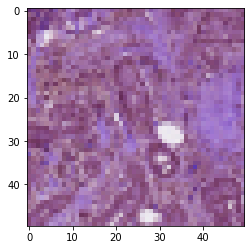

In [7]:
img = cv2.imread(Yes_path+'\8867_idx5_x901_y1301_class1.png') #reading the img
print(img.shape)     
plt.imshow(img)

In [8]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

162
1480


In [9]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['8867_idx5_x1001_y1001_class1.png', '8867_idx5_x1001_y1051_class1.png', '8867_idx5_x1001_y1101_class1.png', '8867_idx5_x1001_y1151_class1.png', '8867_idx5_x1001_y1201_class1.png', '8867_idx5_x1001_y1251_class1.png', '8867_idx5_x1001_y1301_class1.png', '8867_idx5_x1001_y1351_class1.png', '8867_idx5_x1001_y851_class1.png', '8867_idx5_x1001_y901_class1.png', '8867_idx5_x1001_y951_class1.png', '8867_idx5_x1051_y1001_class1.png', '8867_idx5_x1051_y1051_class1.png', '8867_idx5_x1051_y1101_class1.png', '8867_idx5_x1051_y1151_class1.png', '8867_idx5_x1051_y1201_class1.png', '8867_idx5_x1051_y1251_class1.png', '8867_idx5_x1051_y1301_class1.png', '8867_idx5_x1051_y851_class1.png', '8867_idx5_x1051_y901_class1.png', '8867_idx5_x1051_y951_class1.png', '8867_idx5_x1101_y1001_class1.png', '8867_idx5_x1101_y1051_class1.png', '8867_idx5_x1101_y1101_class1.png', '8867_idx5_x1101_y1151_class1.png', '8867_idx5_x1101_y1201_class1.png', '8867_idx5_x1101_y1251_class1.png', '8867_idx5_x1101_y901_class1.png'

In [10]:
dataset = list(zip(filepaths, labels))       #convering into dataframe
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels']) # Merging the data
pathframe.__len__()
pathframe.tail()  

,filepaths,labels
1637,C:\Users\dellc\Desktop\TCR\Project\Dataset\0\8...,No
1638,C:\Users\dellc\Desktop\TCR\Project\Dataset\0\8...,No
1639,C:\Users\dellc\Desktop\TCR\Project\Dataset\0\8...,No
1640,C:\Users\dellc\Desktop\TCR\Project\Dataset\0\8...,No
1641,C:\Users\dellc\Desktop\TCR\Project\Dataset\0\8...,No


In [11]:
print(pathframe['labels'].value_counts())

No     1480
Yes     162
Name: labels, dtype: int64


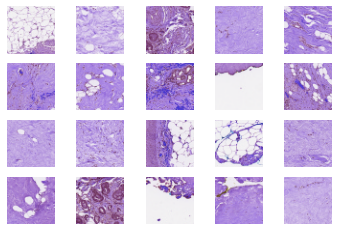

In [12]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [13]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(1477, 2) (165, 2) (1329, 2) (148, 2)


# Preprocessing the dataset

In [14]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 30 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)


In [15]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=False)

Found 1329 validated image filenames belonging to 2 classes.
Found 148 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 50, 50, 3)


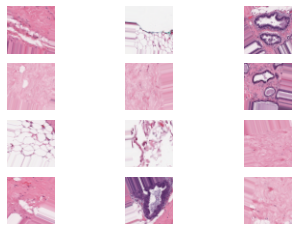

In [16]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    plt.subplot(4,3,i+1)
    plt.imshow(val)
    plt.axis('off')
plt.show()

In [17]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [18]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [19]:
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=16, verbose=1)

C:\Users\dellc\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/16
84/84 [==============================] - 59s 501ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 2/16
84/84 [==============================] - 40s 473ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 3/16
84/84 [==============================] - 39s 470ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 4/16
84/84 [==============================] - 46s 549ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 5/16
84/84 [==============================] - 47s 566ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 6/16
84/84 [==============================] - 41s 488ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 7/16
84/84 [==============================] - 38s 454ms/step - loss: nan - accuracy: 0.9029 - val_loss: nan - val_accuracy: 0.9189
Epoch 8/16
84/84 [=======================

In [20]:
model.evaluate(test_gen)

11/11 [==============================] - 1s 59ms/step - loss: nan - accuracy: 0.8727


[nan, 0.8727272748947144]